In [1]:
import sys
import os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

print("Project root added to sys.path")


Project root added to sys.path


In [2]:

from utils.data_loader import load_dataset
from utils.data_partition import iid_partition, non_iid_partition, dirichlet_partition, quantity_skew_partition, temporal_partition, hybrid_partition
import torch

trainset, testset = load_dataset('fashionmnist', root='./data')
num_clients = 5

iid_subsets = iid_partition(trainset, num_clients)
non_iid_subsets = non_iid_partition(trainset, num_clients, num_shards=10)
dirichlet_subsets = dirichlet_partition(trainset, num_clients, alpha=0.5)
quantity_subsets = quantity_skew_partition(trainset, num_clients, min_ratio=0.1, max_ratio=0.5)
temporal_subsets = temporal_partition(trainset, num_clients)
hybrid_subsets = hybrid_partition(trainset, num_clients, alpha=0.5, min_ratio=0.1, max_ratio=0.5)

partitions = {
    "IID": iid_subsets,
    "Non-IID (Shards)": non_iid_subsets,
    "Dirichlet": dirichlet_subsets,
    "Quantity Skew": quantity_subsets,
    "Temporal": temporal_subsets,
    "Hybrid": hybrid_subsets
}


dataset_name = "fashionmnist"
num_clients = 5
rounds = 10
device = "cuda" if torch.cuda.is_available() else "cpu"



c:\Users\la7tim\AppData\Local\Programs\Python\Python311\Lib\site-packages\torchvision\io\image.py:13: UserWarning: Failed to load image Python extension: '[WinError 127] The specified procedure could not be found'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(


100%|██████████| 26421880/26421880 [00:06<00:00, 4200028.16it/s]


Extracting ./data\FashionMNIST\raw\train-images-idx3-ubyte.gz to ./data\FashionMNIST\raw



100%|██████████| 29515/29515 [00:00<00:00, 1485615.84it/s]


Extracting ./data\FashionMNIST\raw\train-labels-idx1-ubyte.gz to ./data\FashionMNIST\raw



100%|██████████| 4422102/4422102 [00:00<00:00, 5291814.39it/s]


Extracting ./data\FashionMNIST\raw\t10k-images-idx3-ubyte.gz to ./data\FashionMNIST\raw



100%|██████████| 5148/5148 [00:00<00:00, 5142242.67it/s]

Extracting ./data\FashionMNIST\raw\t10k-labels-idx1-ubyte.gz to ./data\FashionMNIST\raw

[INFO] Loaded dataset 'fashionmnist' with 60000 training samples and 10000 testing samples.


In [3]:
trainset, testset = load_dataset(dataset_name)

[INFO] Loaded dataset 'fashionmnist' with 60000 training samples and 10000 testing samples.


In [4]:
from models.tinyProp import TinyPropParams
tinyprop_params = TinyPropParams(S_min=0.05, S_max=0.5, zeta=0.25, number_of_layers=2)

all_results = {}

In [5]:
from clients.aggregators import avg_aggregate
from clients.federated_training import federated_training
for strategy, subsets in partitions.items():
    print(f"\n=== Federated Training with {strategy.upper()} partitions ===")

    global_model, acc_list, flops_list, mem_list, comm_list, sparsity_list = federated_training(
        client_datasets=subsets,
        model_name=dataset_name,
        testset=testset,
        tinyprop_params=tinyprop_params,
        aggregator_fn=avg_aggregate,  
        aggregator_kwargs=None,
        rounds=rounds,
        device=device,
        local_epochs=1,    
        visualize=False     
    )

    final_acc     = acc_list[-1]          if acc_list      else 0
    final_flops   = flops_list[-1]        if flops_list    else 0
    final_mem     = mem_list[-1]          if mem_list      else 0
    final_comm    = comm_list[-1]         if comm_list     else 0
    final_spars   = sparsity_list[-1]     if sparsity_list else 0

    print(f"[{strategy.upper()}] Final Accuracy: {final_acc:.4f}")
    print(f"[{strategy.upper()}] Final FLOPs:    {final_flops:.2f}")
    print(f"[{strategy.upper()}] Final Memory:   {final_mem:.2f} bytes")
    print(f"[{strategy.upper()}] Final Comm:     {final_comm:.2f} bytes")
    print(f"[{strategy.upper()}] Final Sparsity: {final_spars*100:.2f}%")

    all_results[strategy] = {
        "acc": acc_list,
        "flops": flops_list,
        "mem": mem_list,
        "comm": comm_list,
        "sparsity": sparsity_list
    }

print("\nDone!\n")



=== Federated Training with IID partitions ===

Round 1/10
Test Accuracy: 0.4963
[Compute] round_flops=421892225.51, [Mem] peak=4983892.0 bytes, [Comm] 2743528016.0 bytes, [Sparsity] 22.50%

Round 2/10
Test Accuracy: 0.7848
[Compute] round_flops=319698916.42, [Mem] peak=2102456.0 bytes, [Comm] 2078973920.0 bytes, [Sparsity] 17.05%

Round 3/10
Test Accuracy: 0.8374
[Compute] round_flops=237389511.65, [Mem] peak=1659104.0 bytes, [Comm] 1543723104.0 bytes, [Sparsity] 12.66%

Round 4/10
Test Accuracy: 0.8305
[Compute] round_flops=181135071.18, [Mem] peak=1521916.0 bytes, [Comm] 1177905428.0 bytes, [Sparsity] 9.66%

Round 5/10
Test Accuracy: 0.8545
[Compute] round_flops=149860020.25, [Mem] peak=1291588.0 bytes, [Comm] 974526524.0 bytes, [Sparsity] 7.99%

Round 6/10
Test Accuracy: 0.8578
[Compute] round_flops=121653623.48, [Mem] peak=1030040.0 bytes, [Comm] 791102808.0 bytes, [Sparsity] 6.49%

Round 7/10
Test Accuracy: 0.8737
[Compute] round_flops=113749414.42, [Mem] peak=1055128.0 bytes, [

RuntimeError: selected index k out of range

In [11]:
partitions = {
    "Temporal": temporal_subsets,
    "Hybrid": hybrid_subsets
}

In [12]:
from clients.aggregators import avg_aggregate
from clients.federated_training import federated_training
for strategy, subsets in partitions.items():
    print(f"\n=== Federated Training with {strategy.upper()} partitions ===")

    global_model, acc_list, flops_list, mem_list, comm_list, sparsity_list = federated_training(
        client_datasets=subsets,
        model_name=dataset_name,
        testset=testset,
        tinyprop_params=tinyprop_params,
        aggregator_fn=avg_aggregate,  
        aggregator_kwargs=None,
        rounds=rounds,
        device=device,
        local_epochs=1,    
        visualize=False     
    )

    final_acc     = acc_list[-1]          if acc_list      else 0
    final_flops   = flops_list[-1]        if flops_list    else 0
    final_mem     = mem_list[-1]          if mem_list      else 0
    final_comm    = comm_list[-1]         if comm_list     else 0
    final_spars   = sparsity_list[-1]     if sparsity_list else 0

    print(f"[{strategy.upper()}] Final Accuracy: {final_acc:.4f}")
    print(f"[{strategy.upper()}] Final FLOPs:    {final_flops:.2f}")
    print(f"[{strategy.upper()}] Final Memory:   {final_mem:.2f} bytes")
    print(f"[{strategy.upper()}] Final Comm:     {final_comm:.2f} bytes")
    print(f"[{strategy.upper()}] Final Sparsity: {final_spars*100:.2f}%")

    all_results[strategy] = {
        "acc": acc_list,
        "flops": flops_list,
        "mem": mem_list,
        "comm": comm_list,
        "sparsity": sparsity_list
    }

print("\nDone!\n")



=== Federated Training with TEMPORAL partitions ===

Round 1/10
Test Accuracy: 0.6368
[Compute] round_flops=387758585.08, [Mem] peak=5002456.0 bytes, [Comm] 2521559956.0 bytes, [Sparsity] 20.68%

Round 2/10
Test Accuracy: 0.8155
[Compute] round_flops=266484979.65, [Mem] peak=1513988.0 bytes, [Comm] 1732928372.0 bytes, [Sparsity] 14.21%

Round 3/10
Test Accuracy: 0.8461
[Compute] round_flops=199185559.95, [Mem] peak=1196248.0 bytes, [Comm] 1295286168.0 bytes, [Sparsity] 10.62%

Round 4/10
Test Accuracy: 0.8389
[Compute] round_flops=168560315.75, [Mem] peak=1032780.0 bytes, [Comm] 1096132900.0 bytes, [Sparsity] 8.99%

Round 5/10
Test Accuracy: 0.8430
[Compute] round_flops=158356344.97, [Mem] peak=1095232.0 bytes, [Comm] 1029777376.0 bytes, [Sparsity] 8.45%

Round 6/10
Test Accuracy: 0.8706
[Compute] round_flops=155522425.65, [Mem] peak=953020.0 bytes, [Comm] 1011348648.0 bytes, [Sparsity] 8.29%

Round 7/10
Test Accuracy: 0.8694
[Compute] round_flops=142944630.34, [Mem] peak=1039296.0 by

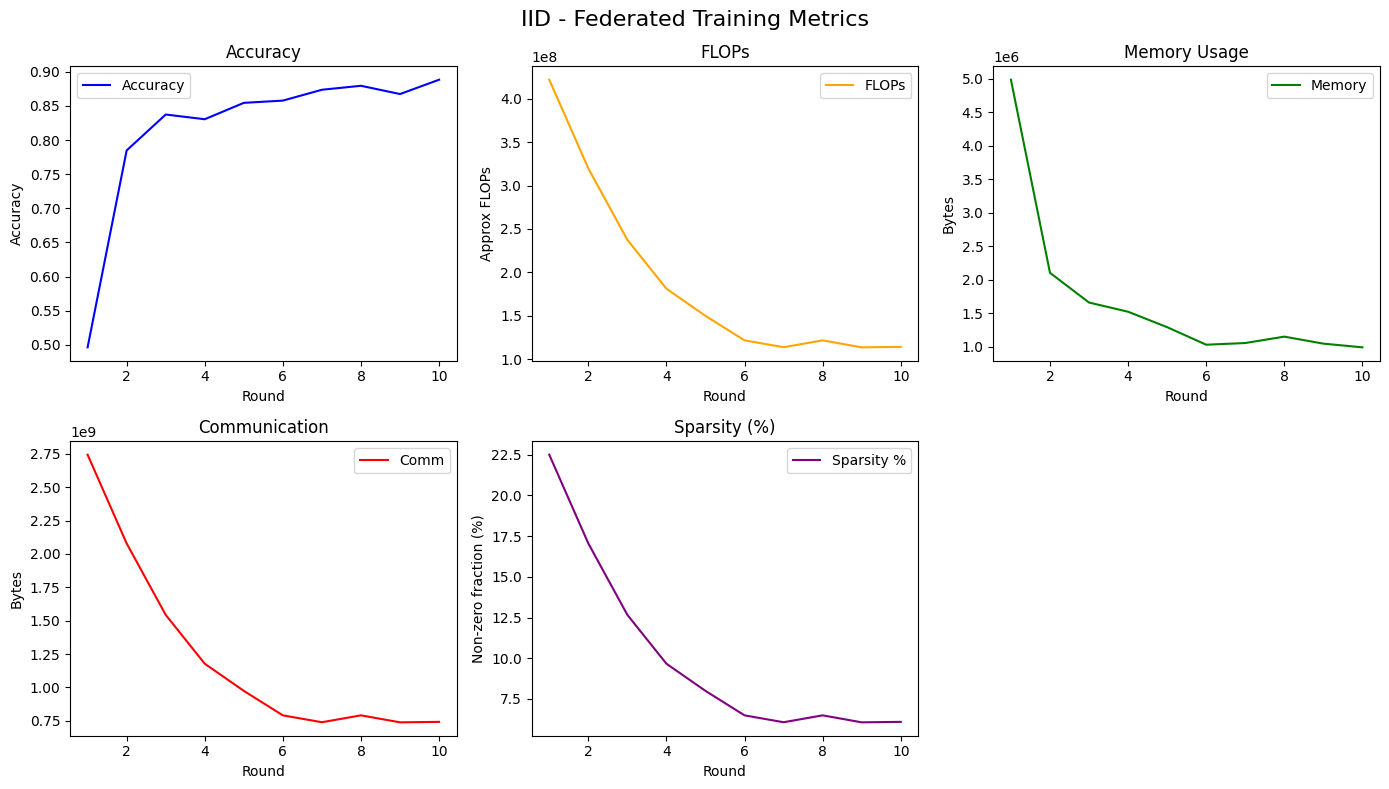

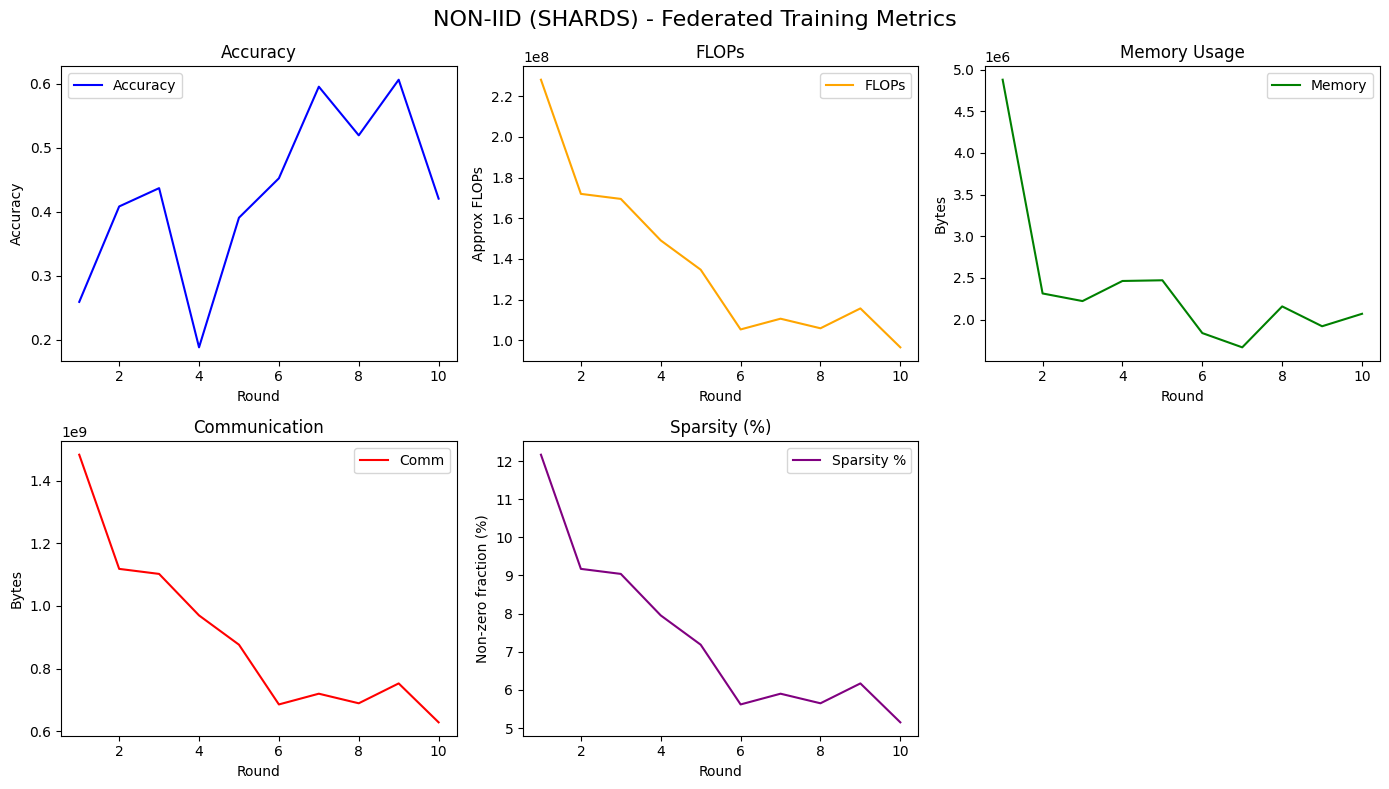

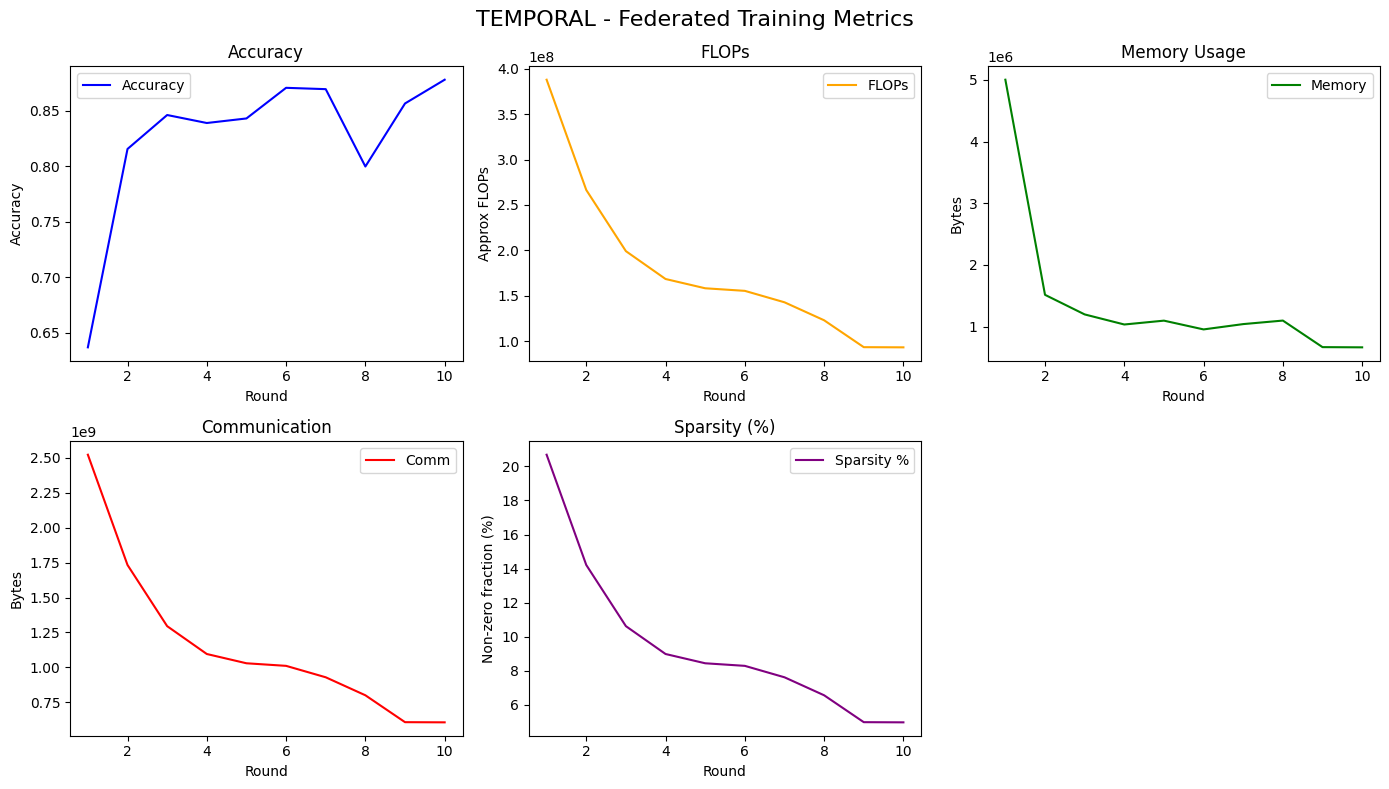

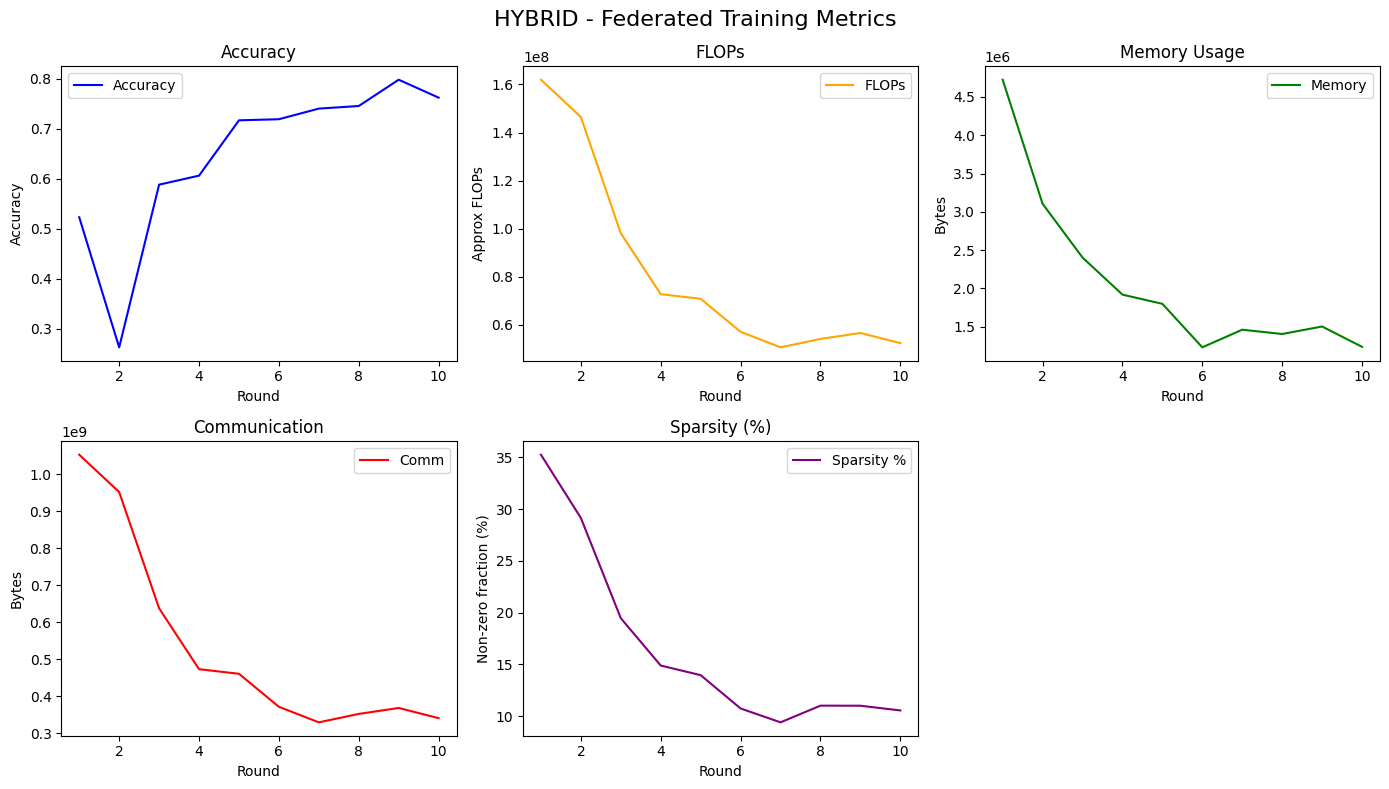

In [13]:
import matplotlib.pyplot as plt

for strategy, metrics in all_results.items():
    rounds_axis = range(1, len(metrics["acc"])+1)
    
    fig, axs = plt.subplots(2, 3, figsize=(14, 8))
    fig.suptitle(f"{strategy.upper()} - Federated Training Metrics", fontsize=16)

    # 1) Accuracy
    axs[0, 0].plot(rounds_axis, metrics["acc"], label="Accuracy", color='blue')
    axs[0, 0].set_title("Accuracy")
    axs[0, 0].set_xlabel("Round")
    axs[0, 0].set_ylabel("Accuracy")
    axs[0, 0].legend()

    # 2) FLOPs
    axs[0, 1].plot(rounds_axis, metrics["flops"], label="FLOPs", color='orange')
    axs[0, 1].set_title("FLOPs")
    axs[0, 1].set_xlabel("Round")
    axs[0, 1].set_ylabel("Approx FLOPs")
    axs[0, 1].legend()

    # 3) Memory
    axs[0, 2].plot(rounds_axis, metrics["mem"], label="Memory", color='green')
    axs[0, 2].set_title("Memory Usage")
    axs[0, 2].set_xlabel("Round")
    axs[0, 2].set_ylabel("Bytes")
    axs[0, 2].legend()

    # 4) Communication
    axs[1, 0].plot(rounds_axis, metrics["comm"], label="Comm", color='red')
    axs[1, 0].set_title("Communication")
    axs[1, 0].set_xlabel("Round")
    axs[1, 0].set_ylabel("Bytes")
    axs[1, 0].legend()

    # 5) Sparsity
    if "sparsity" in metrics:
        sps = [s * 100 for s in metrics["sparsity"]]
        axs[1, 1].plot(rounds_axis, sps, label="Sparsity %", color='purple')
        axs[1, 1].set_title("Sparsity (%)")
        axs[1, 1].set_xlabel("Round")
        axs[1, 1].set_ylabel("Non-zero fraction (%)")
        axs[1, 1].legend()
    else:
        axs[1, 1].set_title("No Sparsity Data")
        axs[1, 1].axis('off')

    axs[1, 2].axis('off')

    plt.tight_layout()
    plt.show()


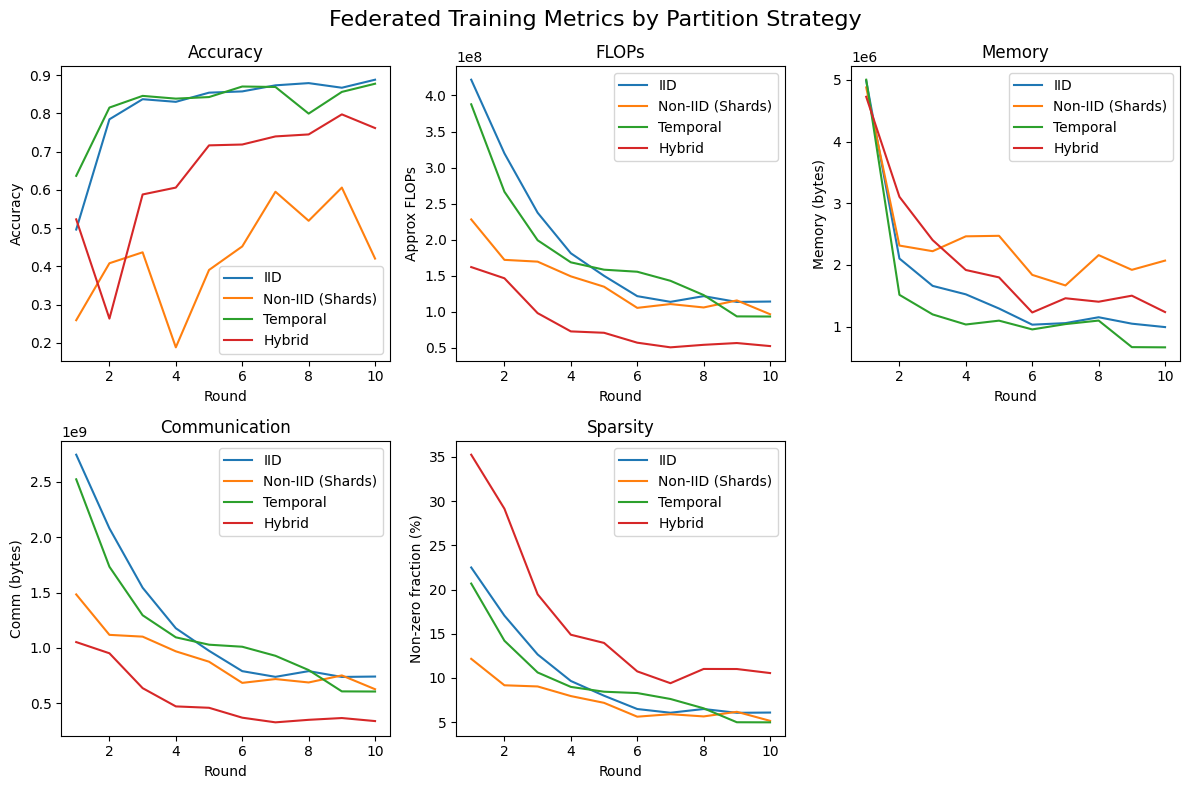

In [14]:
import matplotlib.pyplot as plt

def plot_all_partitions_in_one_figure(all_results):


    metric_keys = ["acc", "flops", "mem", "comm", "sparsity"]
    metric_titles = ["Accuracy", "FLOPs", "Memory", "Communication", "Sparsity"]
    fig, axs = plt.subplots(2, 3, figsize=(12, 8))
    fig.suptitle("Federated Training Metrics by Partition Strategy", fontsize=16)
    axs_flat = axs.ravel()

    for i, key in enumerate(metric_keys):
        ax = axs_flat[i]  
        ax.set_title(metric_titles[i])
        for strategy, data in all_results.items():
            if key not in data:
                continue 

            y_values = data[key]
            rounds_axis = range(1, len(y_values) + 1)

            if key == "sparsity":
                y_values = [val * 100 for val in y_values]
            ax.plot(rounds_axis, y_values, label=strategy)

        ax.set_xlabel("Round")
        if key == "acc":
            ax.set_ylabel("Accuracy")
        elif key == "flops":
            ax.set_ylabel("Approx FLOPs")
        elif key == "mem":
            ax.set_ylabel("Memory (bytes)")
        elif key == "comm":
            ax.set_ylabel("Comm (bytes)")
        elif key == "sparsity":
            ax.set_ylabel("Non-zero fraction (%)")

        ax.legend()

    axs_flat[-1].axis("off")

    plt.tight_layout()
    plt.show()
plot_all_partitions_in_one_figure(all_results)
